In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./Data/Social_Network_Ads.csv")

In [6]:
df.drop(columns=['User ID', 'Gender'], inplace=True)

In [7]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [8]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

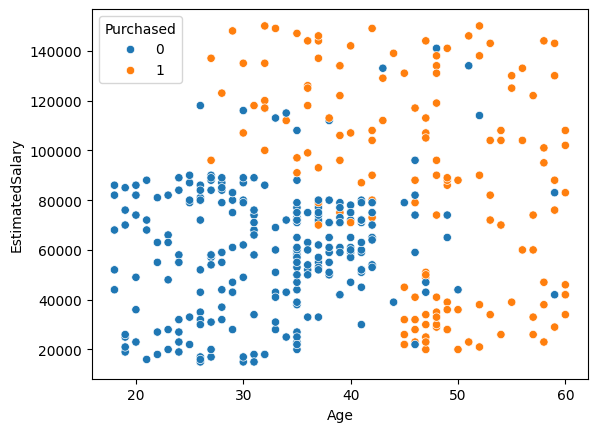

In [13]:
sns.scatterplot(x=df.iloc[:,0], y = df.iloc[:,1], hue=df.iloc[:,2])

In [12]:
df.iloc[:,0]

0      19
1      35
2      26
3      27
4      19
       ..
395    46
396    51
397    50
398    36
399    49
Name: Age, Length: 400, dtype: int64

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age','EstimatedSalary']], df['Purchased'], test_size=0.2, random_state=2)

In [29]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
history = model.fit(x=X_train, y =y_train , validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 50ms/step - loss: 535.1555 - accuracy: 0.5594 - val_loss: 163.2148 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 15ms/step - loss: 221.9451 - accuracy: 0.5031 - val_loss: 108.8357 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 71.9436 - accuracy: 0.4906 - val_loss: 10.8479 - val_accuracy: 0.4000
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 71.1046 - accuracy: 0.5031 - val_loss: 139.3405 - val_accuracy: 0.6000
Epoch 5/100
10/10 [==============================] - 0s 15ms/step - loss: 109.0872 - accuracy: 0.5156 - val_loss: 161.3297 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 73.5254 - accuracy: 0.5719 - val_loss: 16.3017 - val_accuracy: 0.4000
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 33.0297 - accuracy: 0.4781 - val_loss: 44.9063 - val_ac

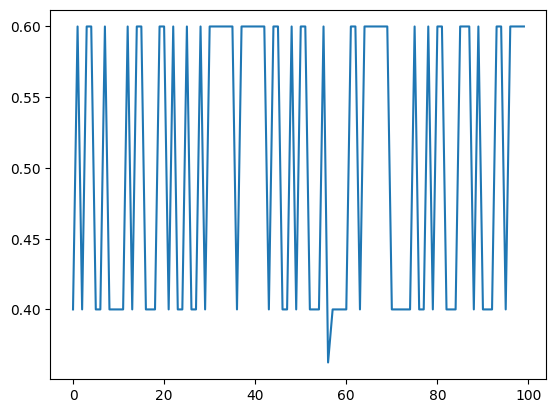

In [33]:
plt.plot(history.history['val_accuracy'])
# because of the unormalised data accuracy stucked on the 40 and 60

# Applying Scaling 

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [36]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [44]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim =2))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
10/10 [==============================] - 2s 133ms/step - loss: 0.6841 - accuracy: 0.6031 - val_loss: 0.6534 - val_accuracy: 0.8125
Epoch 2/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6292 - accuracy: 0.7969 - val_loss: 0.6014 - val_accuracy: 0.8000
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 0.5856 - accuracy: 0.8250 - val_loss: 0.5556 - val_accuracy: 0.8125
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 0.5432 - accuracy: 0.8250 - val_loss: 0.5171 - val_accuracy: 0.8000
Epoch 5/100
10/10 [==============================] - 0s 14ms/step - loss: 0.5082 - accuracy: 0.8281 - val_loss: 0.4824 - val_accuracy: 0.7875
Epoch 6/100
10/10 [==============================] - 0s 15ms/step - loss: 0.4766 - accuracy: 0.8344 - val_loss: 0.4526 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 13ms/step - loss: 0.4472 - accuracy: 0.8531 - val_loss: 0.4266 - val_accuracy: 0.8125
Epoch

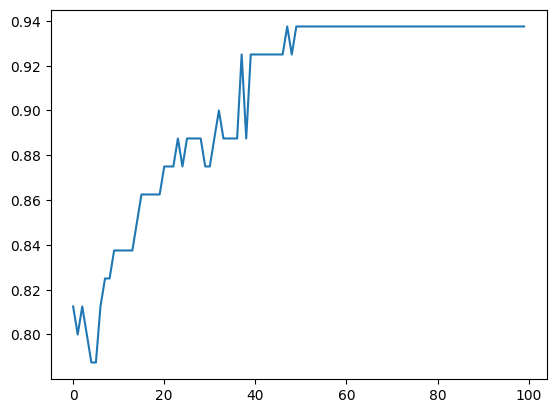

In [47]:
plt.plot(history.history['val_accuracy'])